<a href="https://colab.research.google.com/github/Gus-1003/DataScience/blob/main/Red%20Wine%20Quality/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas:


In [ ]:
import pandas as pd #Processamento de dados
import numpy as np  #Algebra Linear
import seaborn as sns
import matplotlib.pyplot as plt # Impressão de gráficos e diagramas

from imblearn.under_sampling import NearMiss # Util para o Balanceamento

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split # Usado para a realização dos testes

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


Dataset escolhido:

In [ ]:
# Dataset escolhido:

dfvinho = pd.read_csv('https://raw.githubusercontent.com/Gus-1003/Machine_Learning/main/Red%20Wine%20Quality/winequality-red.csv')

# Conceito Base:

Os dois conjuntos de dados estão relacionados com as variantes tinto e branco do vinho "Vinho Verde" português. Devido a questões de privacidade e logística, apenas variáveis ​​físico-químicas (entradas) e sensoriais (saída) estão disponíveis (por exemplo, não há dados sobre os tipos de uva, marca do vinho, preço de venda do vinho, etc.).

Esses conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. As classes são ordenadas e não equilibradas (por exemplo, há muito mais vinhos normais (5 e 6) do que excelentes(>6) ou pobres(<5).

# Preparação dos Dados


**`Atributos:`**

*   ***Acidez fixa***: A maioria dos ácidos envolvidos com o vinho ou fixos ou não voláteis (não evaporam prontamente);

*   ***Acidez volátil***: Em níveis muito altos pode levar a um gosto desagradável de vinagre;

*   ***Ácido Cítrico***: Em pequenas quantidades pode adicionar 'frescor' e sabor aos vinhos;

*   ***Açúcar Residual***: é raro encontrar vinhos com menos de 1 g/l e vinhos com mais de 45 g/l são considerados doces;

*   ***Cloretos***: A quantidade de sal no vinho;

*   ***Dióxido de Enxofre Livre***: Impede o crescimento microbiano e a oxidação do vinho;

*   ***Dióxido de Enxofre Total***: Em baixas concentrações, o SO2 é principalmente indetectável no vinho, mas em concentrações acima de 50 ppm, o SO2 torna-se evidente no nariz e no sabor do vinho;

*   ***Densidade***: É próxima à da água, dependendo do teor de álcool e açúcar;

*   ***pH***: A maioria dos vinhos está entre 3-4 na escala de pH;

*   ***sulfatos***: Um aditivo que pode contribuir para os níveis de gás de dióxido de enxofre (S02), que atua como um antimicrobiano e antioxidante;

*   ***Álcool***: O percentual de teor de álcool do vinho;

*   ***Qualidade***: variável de saída (com base em dados sensoriais, pontuação entre 0 e 10);









---









In [ ]:
# Estudando as caracteristicas dos atributos, verificando os tipos e valores faltosos;
dfvinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# visão do dataset;

dfvinho

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# verificando informações gerais sobre as colunas;

dfvinho.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Coluna Alvo escolhida: Qualidade;

dfvinho['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
# Analisando o Balanceamento da coluna alvo (Qualidade)

dfvinho.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Concluindo: A quantidade de amostras pertecentes a cada nivel está muito distante umas da outras;

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


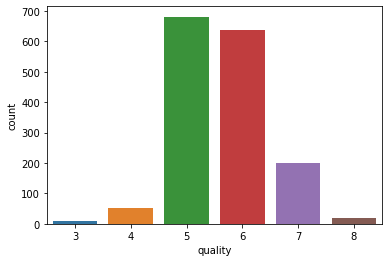

In [ ]:
# Mostrando graficamente a diferença entre os niveis de qualidade;

sns.countplot(dfvinho.quality)

In [ ]:
# Analise em Porcentagem a partir dos niveis de qualidade

classe  = ((dfvinho['quality'].value_counts()/len(dfvinho)).round(6)*100)
print('Percentual de exemplos de cada possível classe (%)')
print(classe)

Percentual de exemplos de cada possível classe (%)
5    42.5891
6    39.8999
7    12.4453
4     3.3146
8     1.1257
3     0.6254
Name: quality, dtype: float64


Conclusão: Com tantos fatos afirmando a diferença na quantidade de amostras. Achamos melhor a exclusão dos niveis com menor quantidade, restando somente as classificações 5 e 6.



---



---

**A partir daqui o dataset aplicado é o dfquality!!!**

In [ ]:
# Ação para a exclusão das qualidades menores que 5 e maiores que 6:

dfquality_5 = dfvinho[dfvinho['quality']==5 ]
dfquality_6 = dfvinho[dfvinho['quality']==6 ]
dfquality = pd.concat ([dfquality_5,dfquality_6])
print(dfquality.quality.value_counts())


5    681
6    638
Name: quality, dtype: int64


Conclusão: Com o metodo dando certo. O novo dataframe,agora balanceado ,denomidado (dfquality) será a ferramenta que usaremos em nossas analises;

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


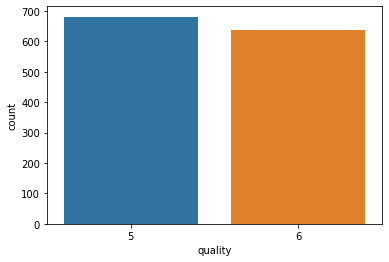

In [ ]:
# Mostrando graficamente a diferença atual entre os niveis de qualidade;

sns.countplot(dfquality.quality)

In [ ]:
classe  = ((dfquality['quality'].value_counts()/len(dfquality)).round(6)*100)
print('Percentual de exemplos de cada possível classe (%)')
print(classe)

Percentual de exemplos de cada possível classe (%)
5    51.63
6    48.37
Name: quality, dtype: float64


In [ ]:
#Descrevendo a estátistica de atributos presentes no novo dataframe:

dfquality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
std,1.682935,0.167679,0.187995,1.399633,0.047538,10.492335,32.714030,0.001815,0.152345,0.167334,0.972354,0.499924
min,4.700000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.370000,8.400000,5.000000
25%,7.100000,0.410000,0.090000,1.900000,0.071000,8.000000,24.000000,0.995800,3.210000,0.540000,9.500000,5.000000
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,40.000000,0.996800,3.310000,0.610000,10.000000,5.000000
75%,9.100000,0.640000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.400000,0.700000,10.900000,6.000000
max,15.900000,1.330000,0.790000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,1.980000,14.900000,6.000000


Conclusão: Se compararmos essa descrição com a anterior podemos perceber que muitas metricas foram alteradas. Isso se torna possivel já que retiramos da equação as amostras que apresentavam valores muito bons ou muito ruins. Podemos considerar que esse balanceamento também pode ser considerado como a eliminação de outliers.

In [ ]:
#Observe por esse gráfico, a diferença de escala entre as variáveis numéricas
#Para alguns algoritmos, isso faz com que ele praticamente desconsidere aqueles com escala menor
#sns.pairplot(dfquality, kind='kde') 

In [ ]:
dfTeste = dfquality.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

dfTeste[['free sulfur dioxide', 'total sulfur dioxide']] = StandardScaler().fit_transform(dfTeste[['free sulfur dioxide', 'total sulfur dioxide']])

print(dfTeste)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4              0.70         0.00  ...       0.56      9.4        5
1               7.8              0.88         0.00  ...       0.68      9.8        5
2               7.8              0.76         0.04  ...       0.65      9.8        5
4               7.4              0.70         0.00  ...       0.56      9.4        5
5               7.4              0.66         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1592            6.3              0.51         0.13  ...       0.75     11.0        6
1593            6.8              0.62         0.08  ...       0.82      9.5        6
1595            5.9              0.55         0.10  ...       0.76     11.2        6
1596            6.3              0.51         0.13  ...       0.75     11.0        6
1598            6.0              0.31         0.47  ...       0.6

In [ ]:
#sns.pairplot(dfTeste, kind='kde')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfquality.drop(columns=['quality']), dfquality['quality'], test_size=0.3, random_state=42)

São passados como parâmetros: as colunas de entrada, a coluna que será ignorada (quality), a coluna alvo (quality) e o tamanho do conjunto de teste (0.3), observe que quando colocamos 0.33, estamos informando que o conjunto de teste será 1/3 do dataset total

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1,leaf_size=10,p=1,metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=1, p=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           5       0.67      0.72      0.70       198
           6       0.70      0.65      0.67       198

    accuracy                           0.68       396
   macro avg       0.69      0.68      0.68       396
weighted avg       0.69      0.68      0.68       396



In [ ]:
params = {'weights': ['uniform', 'distance'],'leaf_size': [10,20,30],'n_neighbors': [1,10,20,30],
           'p':[1,2,3]}
knn_ = KNeighborsClassifier()
grid_search = GridSearchCV(knn_, params)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30],
                         'n_neighbors': [1, 10, 20, 30], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid_search.best_params_

{'leaf_size': 10, 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=30, p=1, weights='distance')

In [ ]:
knn.effective_metric_

'manhattan'

# Naive Bayes

In [ ]:
model = GaussianNB()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           5       0.71      0.76      0.73       213
           6       0.69      0.63      0.66       183

    accuracy                           0.70       396
   macro avg       0.70      0.69      0.70       396
weighted avg       0.70      0.70      0.70       396



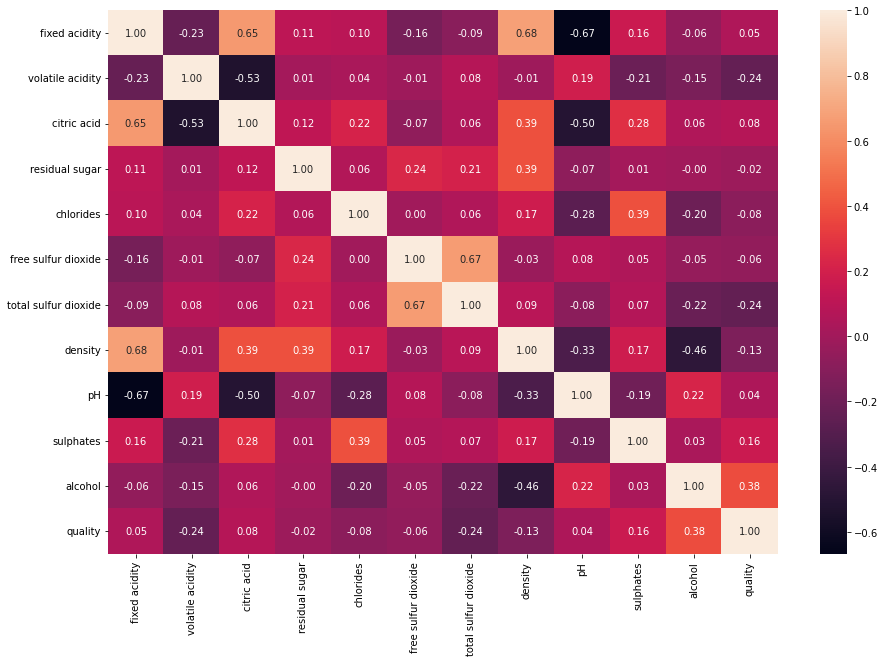

In [ ]:
%matplotlib inline
plt.figure(figsize = (15, 10))
sns.heatmap(dfquality.corr(), annot=True, fmt=".2f")

# SVM

In [ ]:

le = LabelEncoder()
dfquality['quality'] = le.fit_transform(dfquality['quality'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfquality.drop(columns=['quality']), dfquality['quality'],test_size=0.3, stratify=dfquality['quality'])

In [ ]:
params_SVM = {
    'C': [1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'], 
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
    }

In [ ]:
SVC_ = SVC()
grid_search = GridSearchCV(SVC_, params_SVM)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
pred = grid_search.predict(X_test)
print(metrics.classification_report(y_test, pred))

# Rede Neural

In [ ]:
params_MLP = {
    'hidden_layer_sizes': [(100, ), (7, )],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 1000, 5000, 10000]
}

In [ ]:
MLP_ = MLPClassifier()
grid_search_MLP = GridSearchCV(MLP_, params_MLP)
grid_search_MLP.fit(X_train, y_train)

In [ ]:
grid_search_MLP.best_params_

In [ ]:
grid_search_MLP.best_score_